In [12]:
import pandas as pd 

In [13]:
## Load the data
data_path = "C:/Users/Naitik/OneDrive/ドキュメント/Projects/End_to_End_Price_Prediction/src/extracted_data/AmesHousing.csv"
## Use pandas to read the csv
df = pd.read_csv(data_path)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [14]:
from analyze_src.basic_data_inspection import DataInspector,SummaryStatisticsInspectionStrategy,DataTypesInspectionStrategy
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_strategy(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [15]:
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_strategy(df)


 Summary Statistics(Numerical Features):
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026     

Missing values count by column: 
Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64
Visualizing Missing Values: 


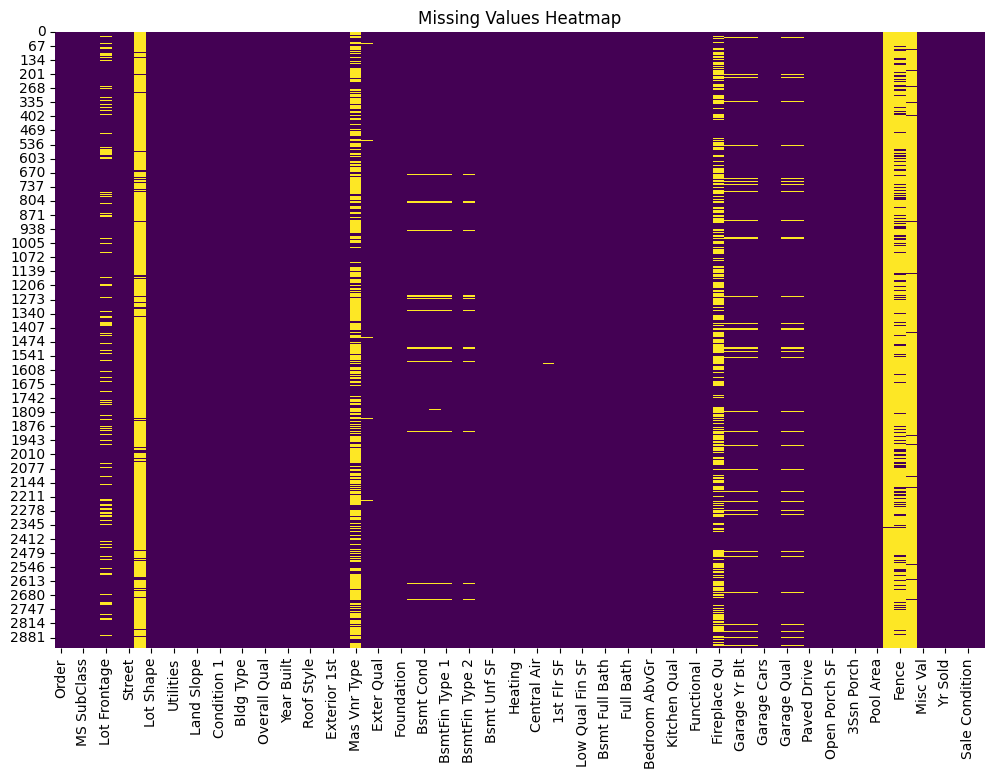

In [16]:
## Missing value Analysis
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

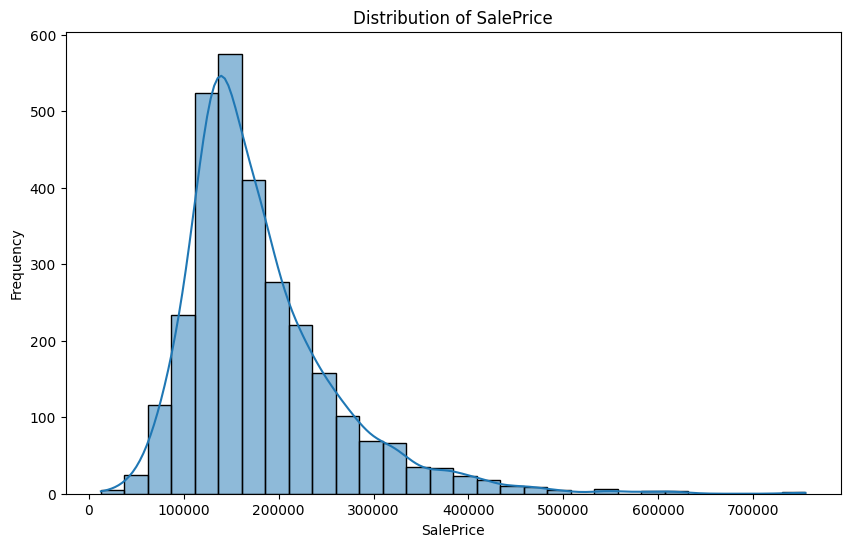

In [17]:
## Univariate Analysis

from analyze_src.univariate_analysis import UnivariateAnalyzer,NumericalUnivariateAnalysis,CategoricalUnivariateAnalysis
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_strategy(df, 'SalePrice')

c:\Users\Naitik\OneDrive\ドキュメント\Projects\End_to_End_Price_Prediction\analysis\analyze_src\univariate_analysis.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette="muted")


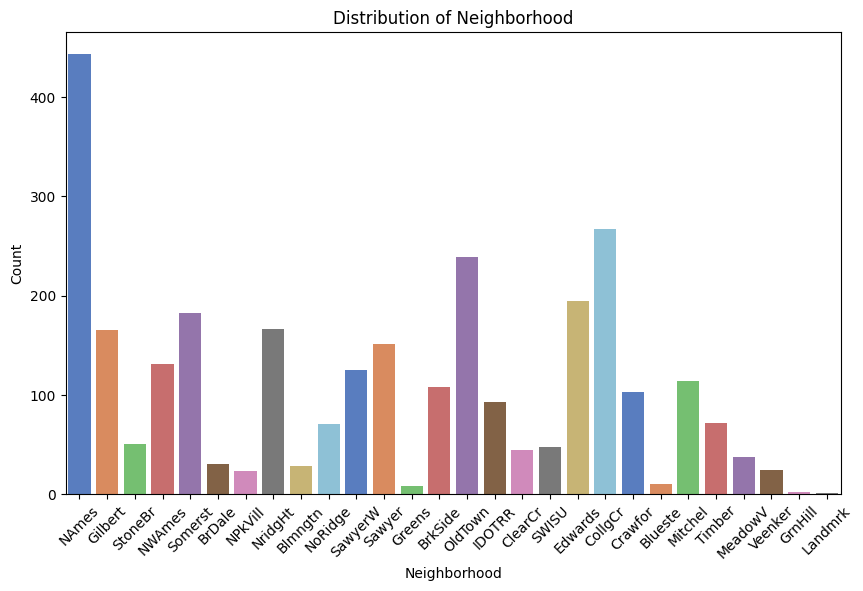

In [18]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_strategy(df, 'Neighborhood')

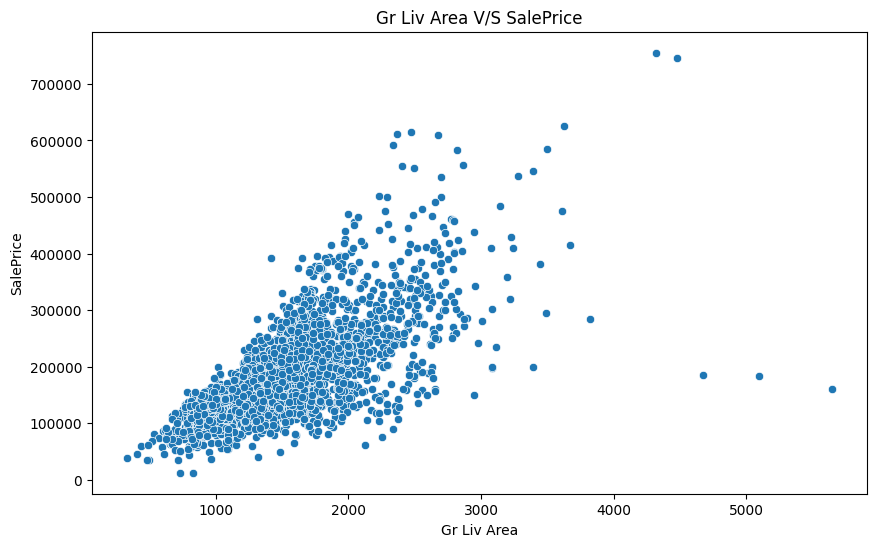

In [19]:
## Bivariate Analysis
from analyze_src.bivariate_analysis import BiVariateAnalyzer,NumericalvsNumericalAnalysis,CategoricalvsNumericalAnalysis
bivariate_analyzer = BiVariateAnalyzer(NumericalvsNumericalAnalysis())
bivariate_analyzer.execute_strategy(df,"Gr Liv Area","SalePrice")

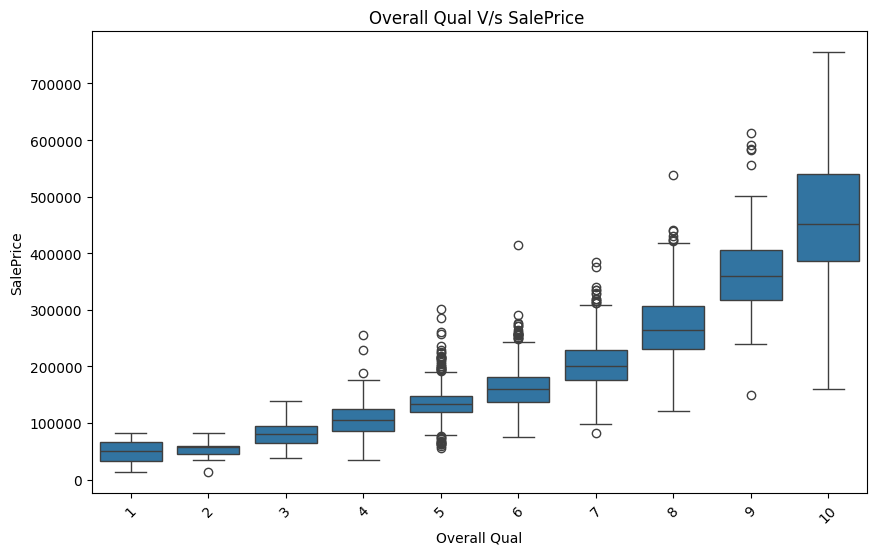

In [20]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalvsNumericalAnalysis())
bivariate_analyzer.execute_strategy(df, 'Overall Qual', 'SalePrice')

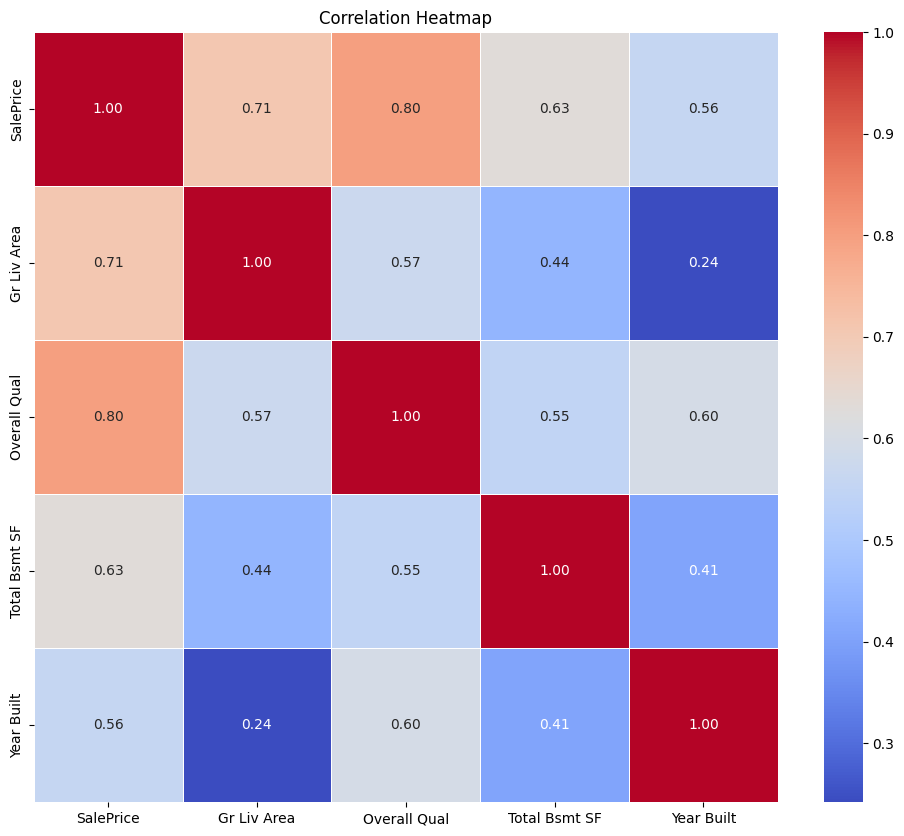

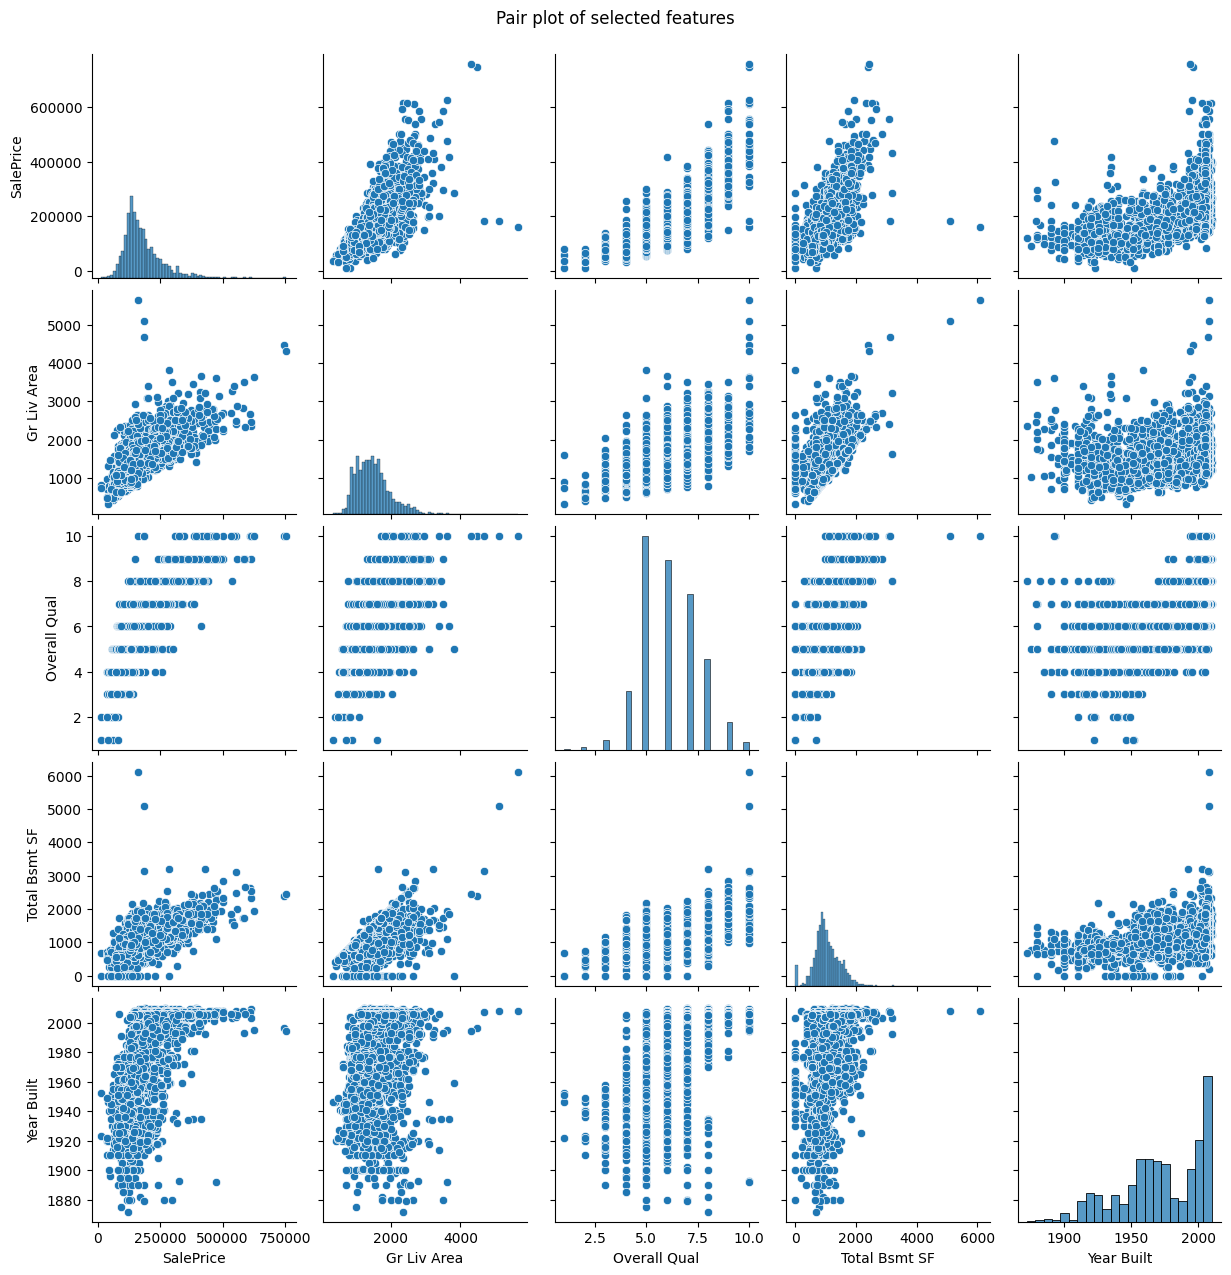

In [21]:
## Multivariate Analysis

from analyze_src.multivariate_analysis import SimpleMultiVariateAnalysis
multivariate_analyzer = SimpleMultiVariateAnalysis()

selected_features = df[['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built']]

multivariate_analyzer.analyze(selected_features)